<a href="https://colab.research.google.com/github/Saithurubilli/Hotel-room-booking-EDA/blob/main/Sai_Kumar_Turubilli_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Importing the required modules & liberaries and connecting the file to be analysed

In [ ]:
#Importing the required modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/hb.csv/Hotel Bookings.csv'
dataset = pd.read_csv(file_path)

Getting the breif Idea about the data and to be analysed

In [ ]:
dataset.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
dataset.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#looking for the columns that are essential or not for analysing the data
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
dataset.shape

(119390, 32)

Finding out the null values


1.Replacing the null values with the 0 for the column agent and company                                                      
2.Replacing the null values of the column country with the mode                                                           
3.Replacing the null values of the column children with the mean

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

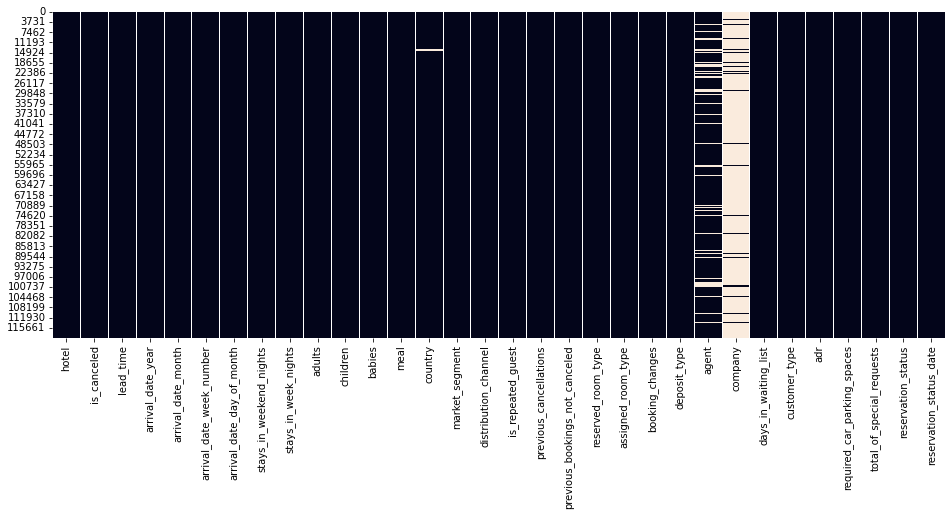

In [ ]:
#We can clearly see that four are three columnswhich contain null values.
#The Columns that contains null values are 'company = 112593','agent = 16340','country = 488' and 'children = 4'
plt.figure(figsize=(16,6))
sns.heatmap(dataset.isnull(), cbar=False)

In [ ]:
#Replacing the null values as stated
dataset[['agent','company']] = dataset[['agent','company']].fillna(0.0)
dataset['country'].fillna(dataset.country.mode().to_string(), inplace=True)
dataset['children'].fillna(round(dataset.children.mean()), inplace=True)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

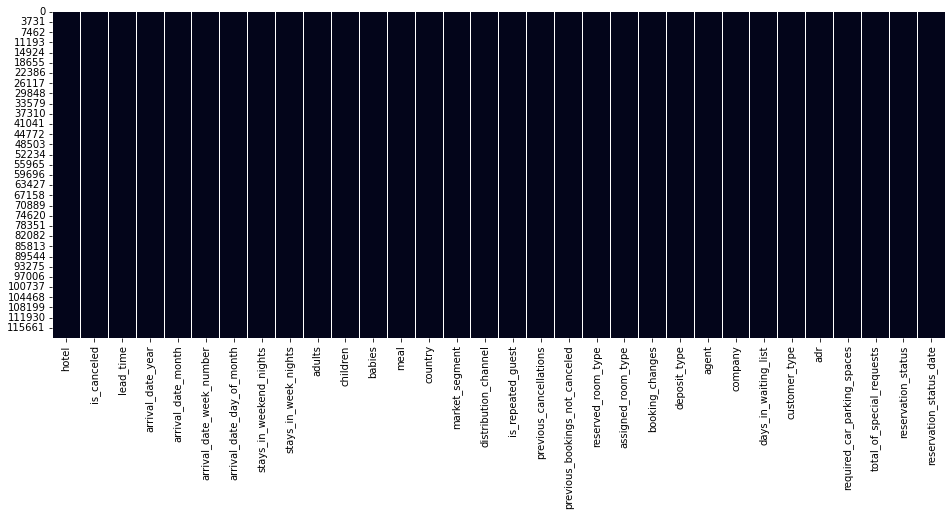

In [ ]:
# after removing null values from the data
plt.figure(figsize=(16,6))
sns.heatmap(dataset.isnull(), cbar=False)

Getting a breif statistical description about the numerical data presence.

In [ ]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Getting the various data types and unique values present in the dataset,                                                                       converting the datatype of columns children, company and agent from float to Integer






In [ ]:
dataset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
dataset[['children','company','agent']] = dataset[['children','company','agent']].astype('int64')

In [ ]:
dataset.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In the Histogram below, we can have a breif picture of various columns trend as below                                                                           
                                                                               1.we can see that the maximum guest came in the year 2016

2.Maximum arrival week number is 30

3.Maximum arrival happens in the last of the month

4.Majority of the booking is cancelled

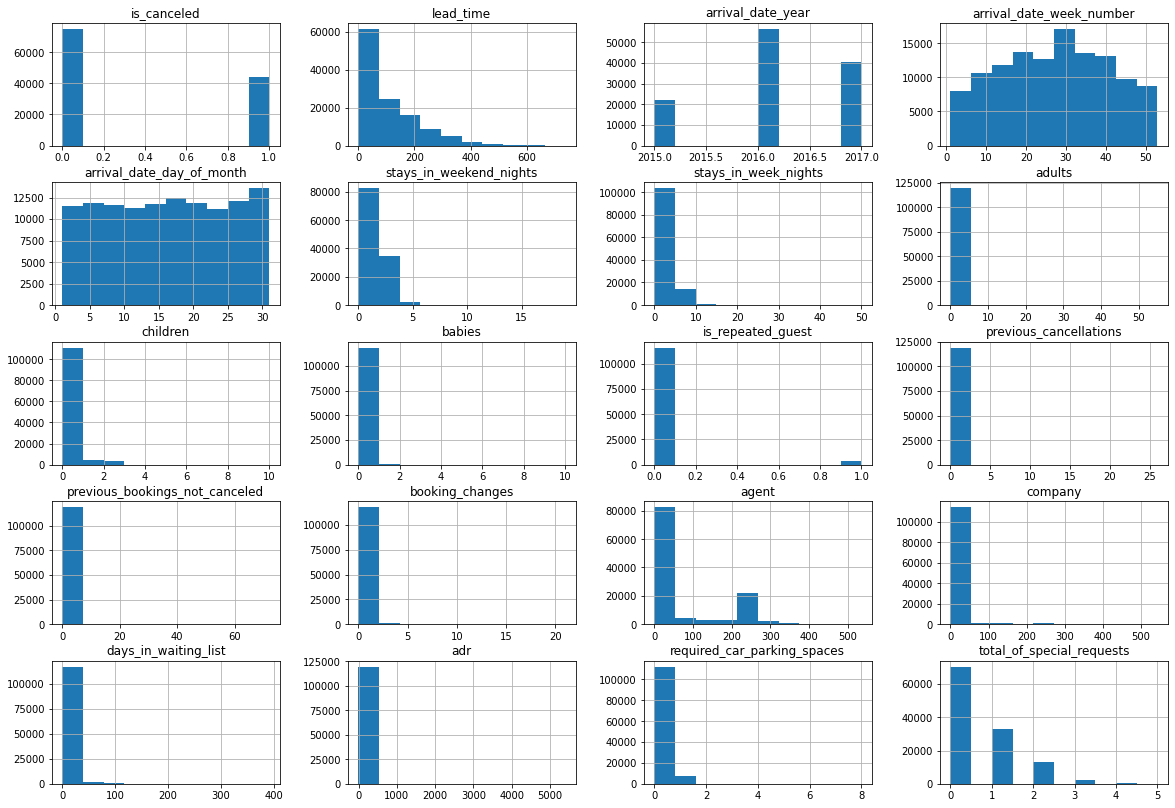

In [ ]:
dataset.hist(figsize=(20,14))
plt.show()

Correlation Analysis

In [ ]:
correl = dataset.corr()
correl

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


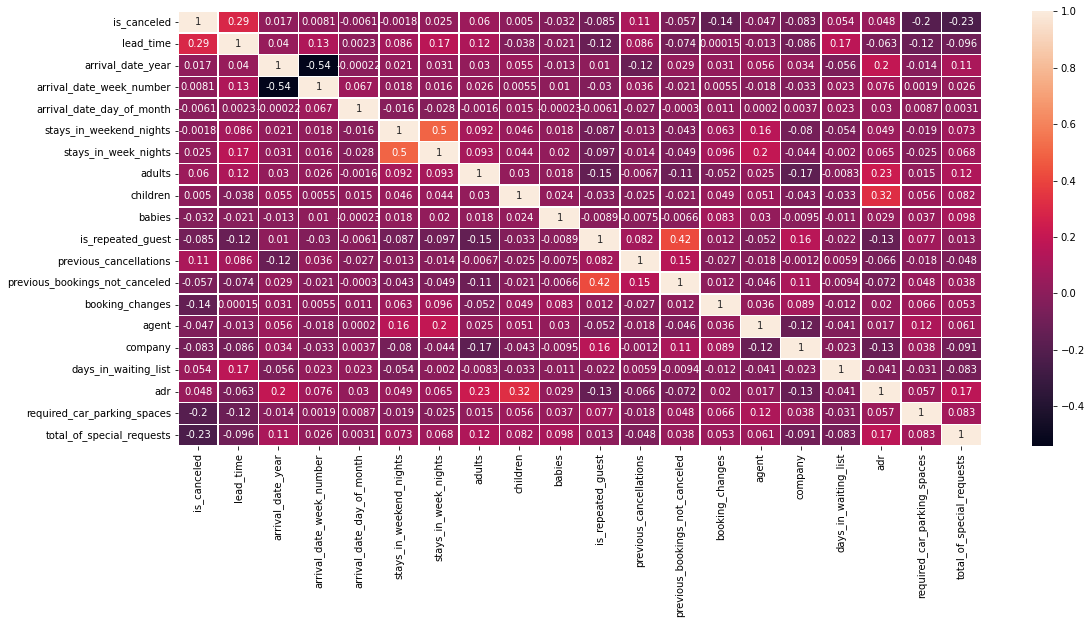

In [ ]:
#Plotting the correlational heatmap using seaborn
plt.figure(figsize=(18,8))
sns.heatmap(correl, annot = True, linewidth =0.5)

There is no correlation between the variables except diagonal element. So we can deduce that variables are independent.

**Analysing and Visualisation of the Dataset**

1. Year and Hotel wise confirmed bookings and cancellation distribution

Text(0.5, 0, 'Hotel')

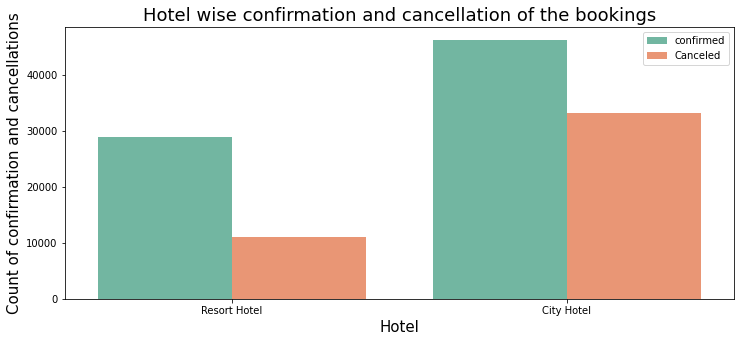

In [ ]:
#year and hotel wise confirmed bookings and cancellation distribution
plt.figure(figsize=(12,5))
sns.countplot(x= 'hotel', hue= 'is_canceled',palette= 'Set2', data= dataset)
plt.legend(['confirmed', 'Canceled'])
plt.title("Hotel wise confirmation and cancellation of the bookings", fontsize = 18)
plt.ylabel("Count of confirmation and cancellations", Fontsize = 15)
plt.xlabel("Hotel",fontsize=15)

0    28938
1    11122
Name: is_canceled, dtype: int64

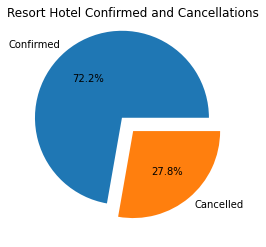

In [ ]:
#Plotting a Pie chart using matplotlib for percentage of confirmed and cancelled bookings of resort hotel
resort_hotel = dataset.loc[(dataset["hotel"] == "Resort Hotel")]
resort_hotel_checkin_cancel = resort_hotel['is_canceled'].value_counts()
mylabels = ["Confirmed","Cancelled"]
myexplode = [0.2,0]
resort_hotel_cancelation = plt.pie(resort_hotel_checkin_cancel, labels = mylabels, explode = myexplode, autopct='%1.1f%%',)
plt.title('Resort Hotel Confirmed and Cancellations')
resort_hotel_checkin_cancel

0    46228
1    33102
Name: is_canceled, dtype: int64

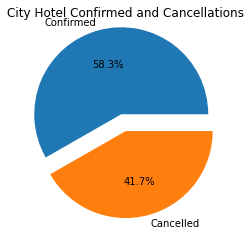

In [ ]:
#Plotting a Pie Chart using matplotlib for percentage of confirmed and canceled bookings of City Hotel
city_hotel = dataset.loc[(dataset["hotel"] == "City Hotel")]
city_hotel_checkin_cancel = city_hotel['is_canceled'].value_counts()
plt.pie(city_hotel_checkin_cancel, labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.title('City Hotel Confirmed and Cancellations')
city_hotel_checkin_cancel

we can clearly conclude from the above graphs that th city hotel is having greater number of bookings as compared to Resort Hotel and the cancellation percentage is high on the City hotel.

In [ ]:
#Removing the cancelled bookings from the data and creating a new dataframe
data_not_canceled = dataset[dataset['is_canceled']==0]

Text(0.5, 0, 'Year')

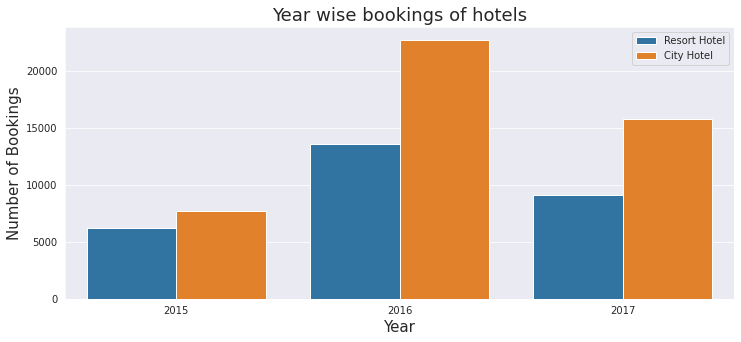

In [ ]:
#Year wise Bookings of hotels
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_year', hue= 'hotel', palette= 'tab10', data = data_not_canceled)
plt.legend(['Resort Hotel', 'City Hotel'])
plt.title("Year wise bookings of hotels", fontsize = 18)
plt.ylabel("Number of Bookings", fontsize = 15)
plt.xlabel("Year", fontsize = 15)

Inference, From the above graph it can be summarised that in the year 2016 both the hotel saw a massive increase in their bookings and by far the year2016 is the year of the highest bookings of both hotel. In each year that is 2015,2016 and 2017 the city hotel is having the highest number of bookings.

2. What is the average daily rate earned per room by different hotels in different years?

Text(0.5, 0, 'Hotel')

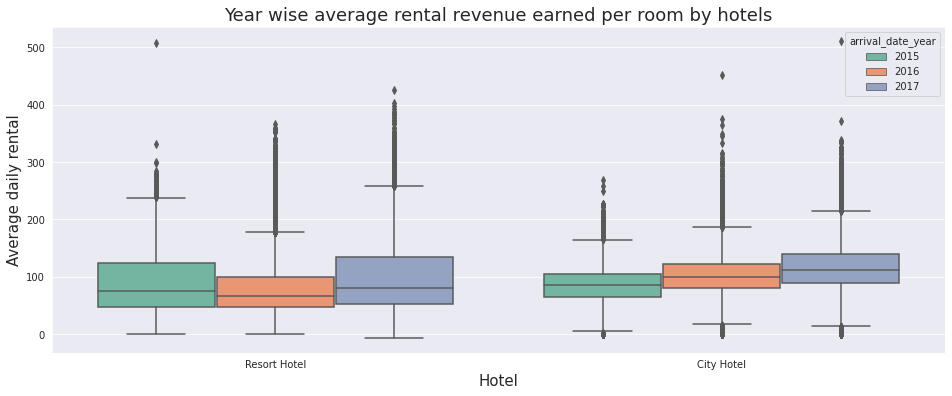

In [ ]:
#Using a box plot to determine the year wise average rental revenue earned per room by hotels
sns.set_style(style="darkgrid")
plt.figure(figsize=(16,6))
sns.boxplot(x="hotel", y="adr", hue="arrival_date_year", palette ="Set2", data= data_not_canceled)
plt.title("Year wise average rental revenue earned per room by hotels", fontsize = 18)
plt.ylabel("Average daily rental", fontsize = 15)
plt.xlabel("Hotel", fontsize = 15)

From the above graph we can notice the following:


*   That the average rental charged in 2015 by resort hotel was higher as compared to the city hotel.
*   In the year 2016 the average rental revenue charged from 50 percent of the customer is in the bracket of around 60-130 range in resort hotel where as 90-130 in city hotel.



3. Requirement of Car parking spaces year and month wise

Text(0.5, 0, 'Months')

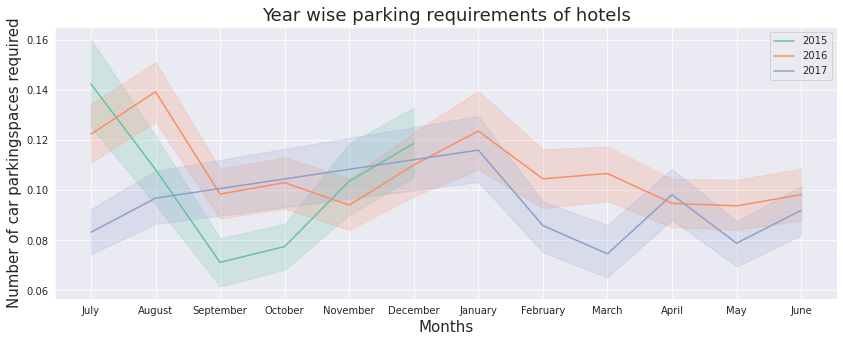

In [ ]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn
plt.figure(figsize=(14,5))
sns.lineplot(data=data_not_canceled, x="arrival_date_month", y = "required_car_parking_spaces", hue= "arrival_date_year", palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title('Year wise parking requirements of hotels', fontsize = 18)
plt.ylabel('Number of car parkingspaces required', fontsize = 15)
plt.xlabel('Months', fontsize = 15)


From the line chart it can be concluded that in the year 2015 from july, the requirement of the car parking spaces was decreasing till september and then in the year 2016 in the month of august the requirement was on peak, whereas in the year 2017 there was a steady requirement of parking spaces.

4.Year Wise number of children guest carries.

Text(0.5, 0, 'Number of children')

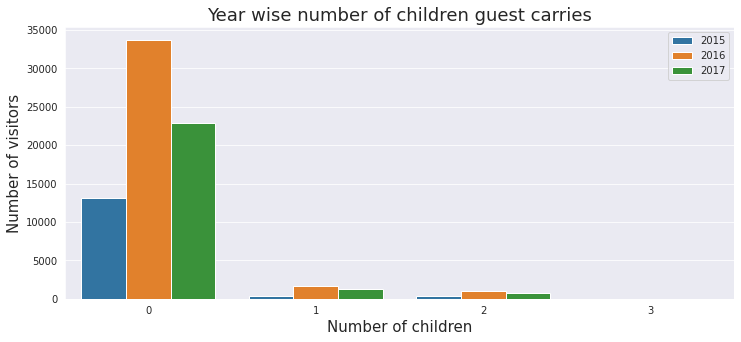

In [ ]:
#creating a count plot using seaborn to observe how many visitors bring children with them to the hotel
plt.figure(figsize=(12,5))
sns.countplot(x='children', hue= 'arrival_date_year', data= data_not_canceled)
plt.legend(['2015','2016', '2017'])
plt.title("Year wise number of children guest carries", fontsize = 18)
plt.ylabel("Number of visitors", fontsize = 15)
plt.xlabel("Number of children", fontsize = 15)

From the above graph it can be summarised that most of the visitors do not carry children with them every year. very less number of children has been carried by them around 1 and 2 only in each year.

5. which of the weeks saw the highest, steady and least number of stays ?

In [ ]:
#Creating anew column that sums up the the number of weekend and weeknight stays
data_not_canceled['no_of_stays'] = data_not_canceled['stays_in_weekend_nights'] + data_not_canceled['stays_in_week_nights']

Text(0.5, 0, 'Week number')

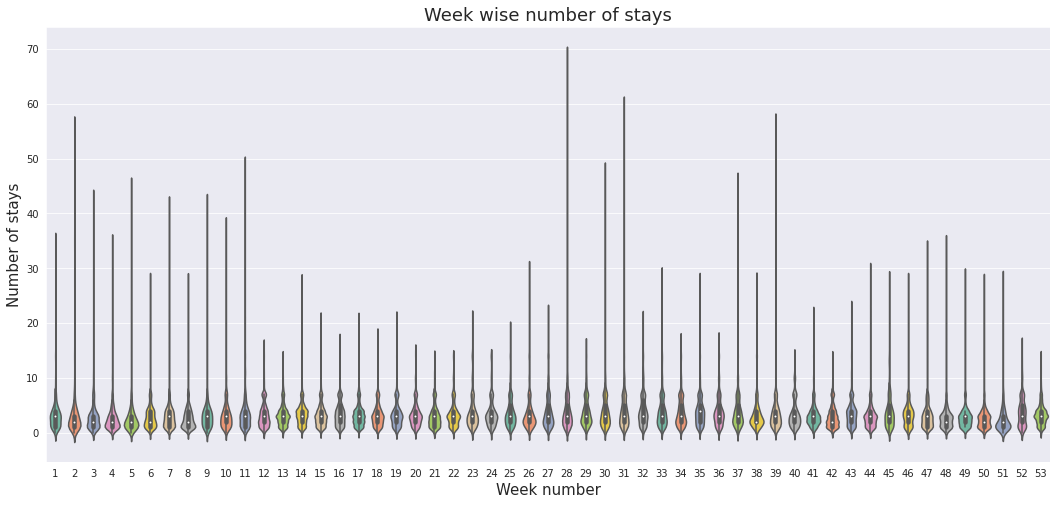

In [ ]:
#Using a violin plot to know in which weeks, visitors stays the most
plt.figure(figsize =(18,8))
sns.violinplot(x="arrival_date_week_number", y="no_of_stays",palette="Set2", data=data_not_canceled)
plt.title("Week wise number of stays", fontsize = 18)
plt.ylabel("Number of stays",fontsize = 15)
plt.xlabel("Week number",fontsize = 15)

From the above violin chart it can be noticed that from the week 28 to 31 has shown the highest days of stay whereas from the week 1 to 11 has shown a very steady trend in the number of stays and also the week 18 to 22 has shown the least number of stays by the visitors in aggregate of all 3 years 2015, 2016 and 2017.

6. Which type of customers visits the most?

Text(0.5, 0, 'Number of Customers')

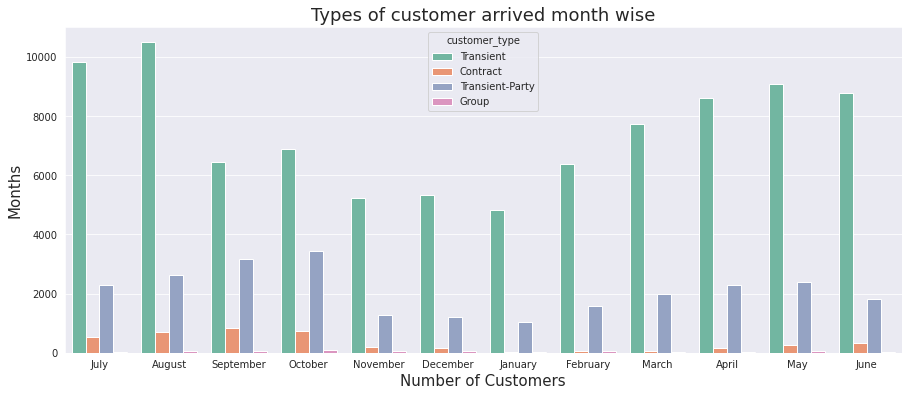

In [ ]:
#using seaborn to plot a count plot chart to demonstrate the type of customers visit the most.
plt.figure(figsize=(15,6))
sns.countplot(x='arrival_date_month', hue='customer_type', palette= "Set2", data= dataset)
plt.title('Types of customer arrived month wise', fontsize = 18)
plt.ylabel('Months', fontsize = 15)
plt.xlabel('Number of Customers', fontsize = 15)

From the above graph, it can be summarised that the transient type of customers visit the most where as Group visitors are least visit to the hotel.

In which of the following months the hotels saw the highest number of guest arrived?

Text(0.5, 0, 'Month')

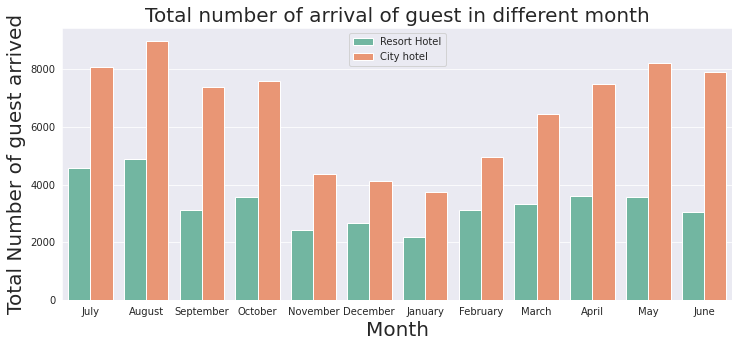

In [ ]:
#Using seaborn to plot a count plot chart to demonstrate that in which of the months number of guest visits the most
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', hue='hotel',palette='Set2', data=dataset)
plt.legend(['Resort Hotel', 'City hotel'])
plt.title('Total number of arrival of guest in different month',fontsize = 20)
plt.ylabel('Total Number of guest arrived',fontsize = 20)
plt.xlabel('Month',fontsize = 20)

From the above the graph it can be summarised that in the month August the hotels saw the highest number of guest arrival and in the month January it was the least

So far we have analysed the various variables and on the basis of that we have visualised the data. We also treated the various null values accordingly and did the correlation analysis.* We took help from the various python documentation present and the various modules to analyze and visualise the data*.